<a href="https://colab.research.google.com/github/Rimsha21/Email-Spam-Classifier/blob/main/NeuralNetworkforHandwritten_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train),(X_test, y_test)= keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

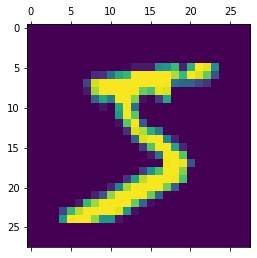

In [ ]:
plt.matshow(X_train[0])

In [ ]:
X_train_flattened=X_train.reshape(len(X_train),28*28)

In [ ]:
X_test_flattened= X_test.reshape(len(X_test),28*28)

In [ ]:
model=keras.Sequential([
                  keras.layers.Dense(10,input_shape=(784, ),activation='sigmoid')

])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.0285 - accuracy: 0.4295
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5729 - accuracy: 0.4669
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4389 - accuracy: 0.5283
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3635 - accuracy: 0.5567
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3256 - accuracy: 0.5732


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 804us/step - loss: 1.2690 - accuracy: 0.5931


[1.2689670324325562, 0.5931000113487244]

In [ ]:
model.predict(X_test_flattened)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

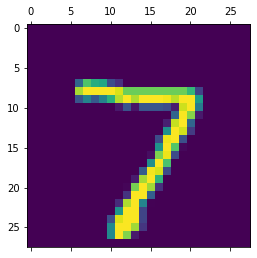

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_pred= model.predict(X_test_flattened)

In [ ]:
y_pred[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
np.argmax(y_pred[0])

7

In [ ]:
y_pred_labels= [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    0,    2,    0,    0,    0,    1,    0,    0],
       [  54, 1074,    3,    3,    0,    0,    0,    1,    0,    0],
       [ 141,    1,  875,    6,    2,    0,    0,    7,    0,    0],
       [ 180,    0,   68,  750,    0,    0,    0,    8,    0,    4],
       [ 205,    0,    4,    5,  758,    0,    0,    3,    0,    7],
       [ 811,    3,    4,   43,    8,    2,    0,   19,    0,    2],
       [ 933,    3,   14,    1,    7,    0,    0,    0,    0,    0],
       [  92,    7,   17,    9,    2,    0,    0,  893,    0,    8],
       [ 934,    5,    4,   15,    7,    0,    0,    9,    0,    0],
       [ 340,    3,    1,    3,   14,    0,    0,   46,    0,  602]],
      dtype=int32)>